In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
df=pd.read_csv( r'/kaggle/input/combine/combined-data.csv')

In [3]:
df.head()

,Unnamed: 0,Destination_IP,Source_Port,Average_Packet_Size,Min_Packet_Length,Max_Packet_Length,Packet_Length_Mean,Fwd_Packet_Length_Min,Fwd_Packet_Length_Max,Fwd_Packet_Length_Mean,...,Subflow_Fwd_Bytes,ACK_Flag_Count,Init_Win_bytes_forward,Flow_IAT_Mean,Fwd_IAT_Max,Fwd_IAT_Mean,Flow_Duration,min_seg_size_forward,Fwd_Header_Length,target
0,0,76,62550,645.0,516.0,516.0,516.0,516.0,516.0,516.0,...,2064,0,-1,1000217.0,3000649.0,1000217.0,3000651,8,56,14
1,1,76,580,645.0,516.0,516.0,516.0,516.0,516.0,516.0,...,2064,0,-1,667464.0,2002389.0,667464.0,2002392,0,40,14
2,2,76,1020,343.5,229.0,229.0,229.0,229.0,229.0,229.0,...,458,0,-1,1.0,1.0,1.0,1,0,0,5
3,3,76,1016,343.5,229.0,229.0,229.0,229.0,229.0,229.0,...,458,0,-1,1.0,1.0,1.0,1,8,16,5
4,4,76,1004,343.5,229.0,229.0,229.0,229.0,229.0,229.0,...,458,0,-1,0.0,0.0,0.0,0,20,40,5


In [4]:
df.tail()

,Unnamed: 0,Destination_IP,Source_Port,Average_Packet_Size,Min_Packet_Length,Max_Packet_Length,Packet_Length_Mean,Fwd_Packet_Length_Min,Fwd_Packet_Length_Max,Fwd_Packet_Length_Mean,...,Subflow_Fwd_Bytes,ACK_Flag_Count,Init_Win_bytes_forward,Flow_IAT_Mean,Fwd_IAT_Max,Fwd_IAT_Mean,Flow_Duration,min_seg_size_forward,Fwd_Header_Length,target
235539,299928,76,815,2208.0,1472.0,1472.0,1472.0,1472.0,1472.0,1472.0,...,2944,0,-1,5.0,5.0,5.0,5,-1062718975,-2125437950,1
235540,299929,76,28025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,5840,1.0,1.0,1.0,1,20,40,14
235541,299930,78,51034,669.0,446.0,446.0,446.0,446.0,446.0,446.0,...,892,0,-1,1.0,1.0,1.0,1,32,64,10
235542,299932,76,62932,645.0,516.0,516.0,516.0,516.0,516.0,516.0,...,2064,0,-1,999943.0,2999827.0,999943.0,2999829,20,1072,14
235543,299933,76,38742,602.0,516.0,516.0,516.0,516.0,516.0,516.0,...,3096,0,-1,1202512.0,3010097.0,1202512.0,6012560,20,120,14


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235544 entries, 0 to 235543
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   235544 non-null  int64  
 1   Destination_IP               235544 non-null  int64  
 2   Source_Port                  235544 non-null  int64  
 3   Average_Packet_Size          235544 non-null  float64
 4   Min_Packet_Length            235544 non-null  float64
 5   Max_Packet_Length            235544 non-null  float64
 6   Packet_Length_Mean           235544 non-null  float64
 7   Fwd_Packet_Length_Min        235544 non-null  float64
 8   Fwd_Packet_Length_Max        235544 non-null  float64
 9   Fwd_Packet_Length_Mean       235544 non-null  float64
 10  Avg_Fwd_Segment_Size         235544 non-null  float64
 11  Total_Length_of_Fwd_Packets  235544 non-null  float64
 12  Subflow_Fwd_Bytes            235544 non-null  int64  
 13 

In [6]:
df.isna().sum()

Unnamed: 0                     0
Destination_IP                 0
Source_Port                    0
Average_Packet_Size            0
Min_Packet_Length              0
Max_Packet_Length              0
Packet_Length_Mean             0
Fwd_Packet_Length_Min          0
Fwd_Packet_Length_Max          0
Fwd_Packet_Length_Mean         0
Avg_Fwd_Segment_Size           0
Total_Length_of_Fwd_Packets    0
Subflow_Fwd_Bytes              0
ACK_Flag_Count                 0
Init_Win_bytes_forward         0
Flow_IAT_Mean                  0
Fwd_IAT_Max                    0
Fwd_IAT_Mean                   0
Flow_Duration                  0
min_seg_size_forward           0
Fwd_Header_Length              0
target                         0
dtype: int64

In [7]:
df['target'].value_counts().sort_index()

target
1     12640
2      5898
3     18444
4      7660
5      8108
6     13735
7     11151
8     13194
9      4943
10    23665
11     7595
13    27014
14    65104
15    16393
Name: count, dtype: int64

In [8]:
df['target'].unique()

array([14,  5, 11, 13,  6,  8,  3,  1,  2,  4, 10, 15,  7,  9])

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


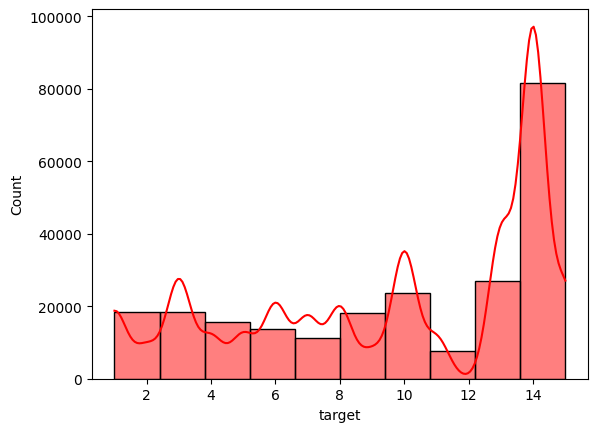

In [9]:
sns.histplot(data=df,x='target',kde=True,color='red',bins=10,multiple='stack',
fill=True,alpha=0.5)
plt.show()

In [10]:
X=df.drop(columns=['target','Unnamed: 0'])
y=df['target']

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
from imblearn.combine import SMOTETomek
sm = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)
print("Before:", y_train.value_counts())
print("After:", pd.Series(y_train_resampled).value_counts())

Before: target
14    51924
13    21593
10    18966
3     14754
15    13091
6     11076
8     10541
1     10141
7      8961
5      6492
4      6130
11     6068
2      4716
9      3982
Name: count, dtype: int64
After: target
9     51487
14    51385
11    51029
5     50915
13    50748
4     49724
3     49705
10    49670
15    49153
8     48768
7     48747
6     48441
1     47913
2     47241
Name: count, dtype: int64


In [13]:
'''from imblearn.over_sampling import SMOTE
from collections import Counter

# استخدم فقط الكلاسات اللي عددها قليل
low_classes = [2, 4, 6, 7, 8, 9, 11]

# نفلتر الداتا فيها الكلاسات دي بس
X_low = X_train[y_train.isin(low_classes)]
y_low = y_train[y_train.isin(low_classes)]

# نعمل SMOTE للكلاسات الضعيفة فقط
smote = SMOTE(random_state=42)
X_low_res, y_low_res = smote.fit_resample(X_low, y_low)

# بعد كده ندمجهم مع باقي البيانات بدون إعادة توازن
X_high = X_train[~y_train.isin(low_classes)]
y_high = y_train[~y_train.isin(low_classes)]

# ندمجهم
import numpy as np
X_balanced = np.vstack((X_high, X_low_res))
y_balanced = np.hstack((y_high, y_low_res))
'''

'from imblearn.over_sampling import SMOTE\nfrom collections import Counter\n\n# استخدم فقط الكلاسات اللي عددها قليل\nlow_classes = [2, 4, 6, 7, 8, 9, 11]\n\n# نفلتر الداتا فيها الكلاسات دي بس\nX_low = X_train[y_train.isin(low_classes)]\ny_low = y_train[y_train.isin(low_classes)]\n\n# نعمل SMOTE للكلاسات الضعيفة فقط\nsmote = SMOTE(random_state=42)\nX_low_res, y_low_res = smote.fit_resample(X_low, y_low)\n\n# بعد كده ندمجهم مع باقي البيانات بدون إعادة توازن\nX_high = X_train[~y_train.isin(low_classes)]\ny_high = y_train[~y_train.isin(low_classes)]\n\n# ندمجهم\nimport numpy as np\nX_balanced = np.vstack((X_high, X_low_res))\ny_balanced = np.hstack((y_high, y_low_res))\n'

In [14]:
def tune_decision_tree(X_train, y_train):
    import optuna
    def objective(trial):
        params = {
            "max_depth": trial.suggest_int("max_depth", 2, 30),
            "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
            "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
        }
        tree = DecisionTreeClassifier(**params, random_state=42)
        tree.fit(X_train_resampled, y_train_resampled)
        preds = tree.predict(X_test)
        return accuracy_score(y_test, preds)
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=30)
    print("Best Decision Tree Params:", study.best_params)
    return study.best_params
best_dt = tune_decision_tree(X_train, y_train)

[I 2025-05-10 17:52:53,971] A new study created in memory with name: no-name-9b77c4d8-460a-40f3-891e-ebc59d10e1bc
[I 2025-05-10 17:53:05,612] Trial 0 finished with value: 0.8679445541191705 and parameters: {'max_depth': 26, 'min_samples_split': 9, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.8679445541191705.
[I 2025-05-10 17:53:17,159] Trial 1 finished with value: 0.8688997856036001 and parameters: {'max_depth': 27, 'min_samples_split': 18, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.8688997856036001.
[I 2025-05-10 17:53:26,692] Trial 2 finished with value: 0.8870067290751237 and parameters: {'max_depth': 15, 'min_samples_split': 6, 'min_samples_leaf': 9}. Best is trial 2 with value: 0.8870067290751237.
[I 2025-05-10 17:53:37,632] Trial 3 finished with value: 0.875098176569233 and parameters: {'max_depth': 22, 'min_samples_split': 18, 'min_samples_leaf': 10}. Best is trial 2 with value: 0.8870067290751237.
[I 2025-05-10 17:53:48,302] Trial 4 finished with value: 0.8

Best Decision Tree Params: {'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 8}


In [15]:
def tune_random_forest(X_train, y_train):
    import optuna
    def objective(trial):
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 100, 300),
            "max_depth": trial.suggest_int("max_depth", 5, 20),
            "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
            "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
            "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
        }
        rfc = RandomForestClassifier(**params, random_state=42, n_jobs=-1)
        rfc.fit(X_train_resampled, y_train_resampled)
        preds = rfc.predict(X_test)
        return accuracy_score(y_test, preds)
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=10)
    print("Best Random Forest Params:", study.best_params)
    return study.best_params
best_rf = tune_random_forest(X_train, y_train)

[I 2025-05-10 17:57:16,238] A new study created in memory with name: no-name-e61d92aa-5d55-4e3d-a32d-e9f39a1dfd46
[I 2025-05-10 17:58:37,048] Trial 0 finished with value: 0.890551699250674 and parameters: {'n_estimators': 132, 'max_depth': 17, 'min_samples_split': 4, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.890551699250674.
[I 2025-05-10 18:00:06,857] Trial 1 finished with value: 0.8876223226984228 and parameters: {'n_estimators': 173, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 0 with value: 0.890551699250674.
[I 2025-05-10 18:01:20,155] Trial 2 finished with value: 0.8902757434885054 and parameters: {'n_estimators': 125, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 0 with value: 0.890551699250674.
[I 2025-05-10 18:02:30,858] Trial 3 finished with value: 0.8720202084527373 and parameters: {'n_estimators': 253, 'max_depth': 5, 'min_sa

Best Random Forest Params: {'n_estimators': 132, 'max_depth': 17, 'min_samples_split': 4, 'min_samples_leaf': 7, 'max_features': 'sqrt'}


In [23]:
rfc=RandomForestClassifier(n_estimators=132, max_depth=17, min_samples_split=4, min_samples_leaf=7, max_features='sqrt')
tree=DecisionTreeClassifier(max_depth=14,
min_samples_leaf=8,min_samples_split=6)

In [24]:
rfc.fit(X_train_resampled,y_train_resampled)
tree.fit(X_train_resampled,y_train_resampled)

DecisionTreeClassifier(max_depth=14, min_samples_leaf=8, min_samples_split=6)

In [18]:
print(classification_report(y_test,rfc.predict(X_test)))

              precision    recall  f1-score   support

           1       0.81      0.62      0.70      2499
           2       0.42      0.53      0.47      1182
           3       0.96      0.99      0.97      3690
           4       0.93      0.75      0.83      1530
           5       0.90      0.97      0.93      1616
           6       0.76      0.80      0.78      2659
           7       0.48      0.39      0.43      2190
           8       0.57      0.64      0.60      2653
           9       1.00      1.00      1.00       961
          10       0.99      1.00      0.99      4699
          11       0.94      1.00      0.97      1527
          13       0.94      0.99      0.96      5421
          14       1.00      0.99      0.99     13180
          15       1.00      0.98      0.99      3302

    accuracy                           0.89     47109
   macro avg       0.83      0.83      0.83     47109
weighted avg       0.89      0.89      0.89     47109



In [19]:
print(classification_report(y_test,tree.predict(X_test)))

              precision    recall  f1-score   support

           1       0.79      0.58      0.67      2499
           2       0.40      0.53      0.46      1182
           3       0.96      0.98      0.97      3690
           4       0.91      0.75      0.82      1530
           5       0.89      0.96      0.92      1616
           6       0.75      0.80      0.77      2659
           7       0.45      0.27      0.34      2190
           8       0.55      0.73      0.63      2653
           9       1.00      1.00      1.00       961
          10       0.99      0.99      0.99      4699
          11       0.94      1.00      0.97      1527
          13       0.94      0.99      0.96      5421
          14       1.00      0.99      0.99     13180
          15       0.99      0.98      0.99      3302

    accuracy                           0.89     47109
   macro avg       0.83      0.82      0.82     47109
weighted avg       0.89      0.89      0.88     47109



In [21]:
from sklearn.metrics import f1_score # Import the f1_score function
f1_score(y_test,rfc.predict(X_test), average='weighted') # Changed average to 'weighted' to handle multiclass targets

0.8912017027701752

In [22]:
from sklearn.metrics import f1_score # Import the f1_score function
f1_score(y_test,tree.predict(X_test), average='weighted') # Changed average to 'weighted' to handle multiclass targets

0.8849116380878607